In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\Sanjeet Jaiswal\Downloads\customer_shopping_behavior.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [6]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [7]:
#replace with median

df["Review Rating"]=df.groupby("Category") ["Review Rating"].transform(lambda x:x.fillna(x.median()))

In [8]:
df.isnull().sum()


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
# change column name lower case

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})


In [10]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [11]:
#feature engineering
# create a column age_group

labels=['Young_adult','Adult','Middle-aged', 'Senior']
df['age_group']=pd.qcut(df["age"], q=4,labels=labels)       



In [12]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young_adult
2,50,Middle-aged
3,21,Young_adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young_adult
8,26,Young_adult
9,57,Middle-aged


In [13]:
# create column purchase_frequency_days

frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [14]:
df[['purchase_frequency_days','frequency_of_purchases']].head()

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually


In [15]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [16]:
(df['discount_applied']==df['promo_code_used']).all()

True

In [17]:
df=df.drop('promo_code_used',axis=1)

In [18]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

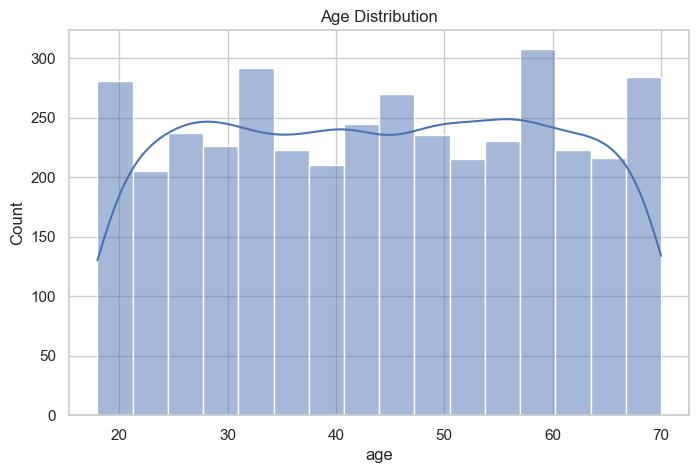

In [20]:
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

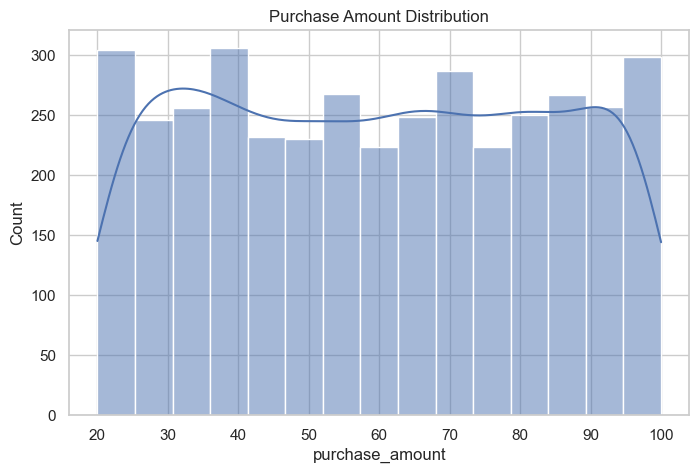

In [21]:
# Purchase Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['purchase_amount'], kde=True)
plt.title("Purchase Amount Distribution")
plt.show()


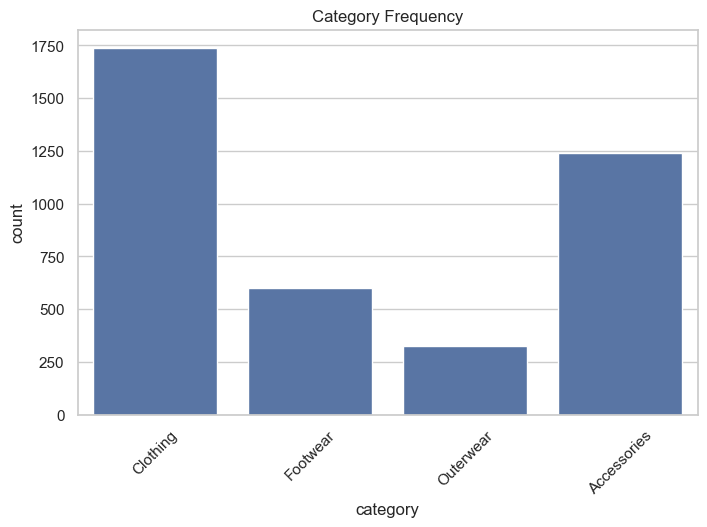

In [22]:
# 3. Category Count
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='category')
plt.title("Category Frequency")
plt.xticks(rotation=45)
plt.show()

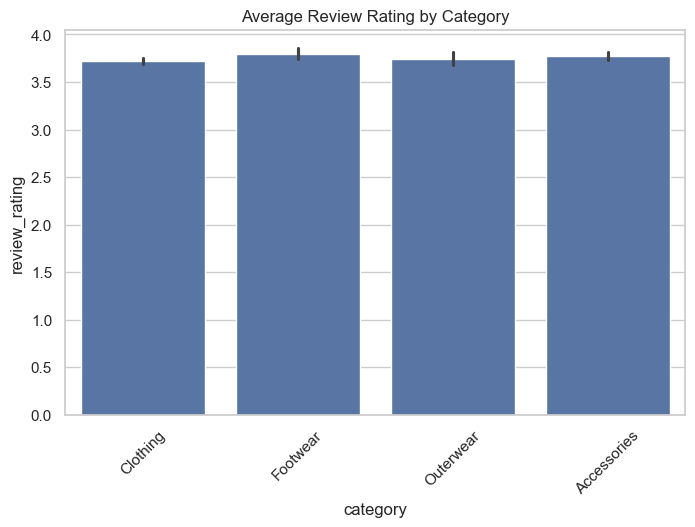

In [23]:
# 4. Average Review Rating by Category
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='category', y='review_rating', estimator='mean')
plt.title("Average Review Rating by Category")
plt.xticks(rotation=45)
plt.show()

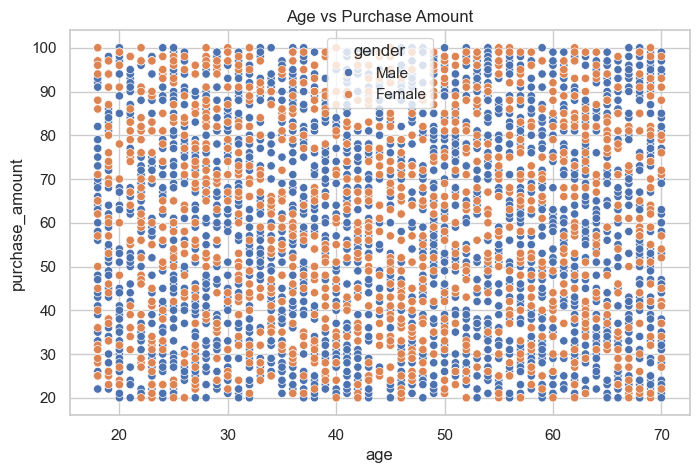

In [24]:
# 5. Age vs Purchase Amount
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='purchase_amount', hue='gender')
plt.title("Age vs Purchase Amount")
plt.show()

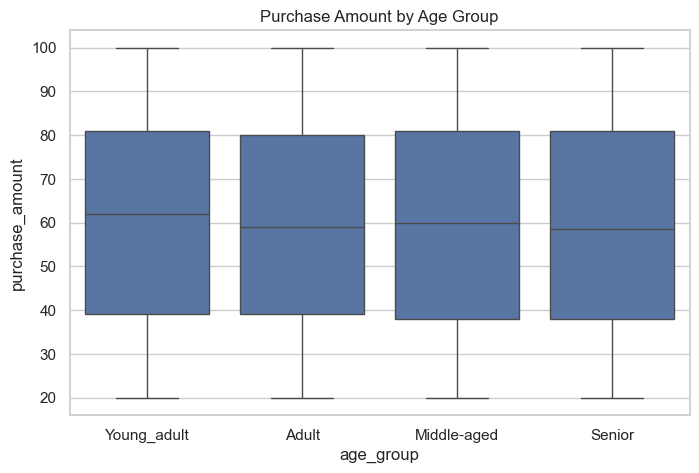

In [25]:
# 6. Purchase Amount By Age Group
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='age_group', y='purchase_amount')
plt.title("Purchase Amount by Age Group")
plt.show()

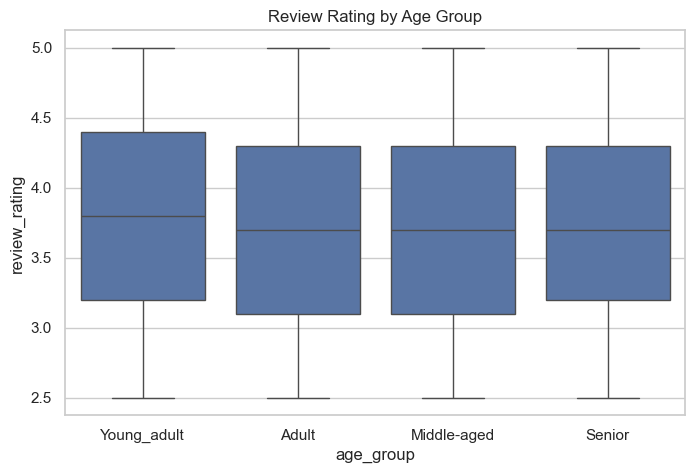

In [26]:
# 8. Review Rating Distribution by Age Group
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='age_group', y='review_rating')
plt.title("Review Rating by Age Group")
plt.show()


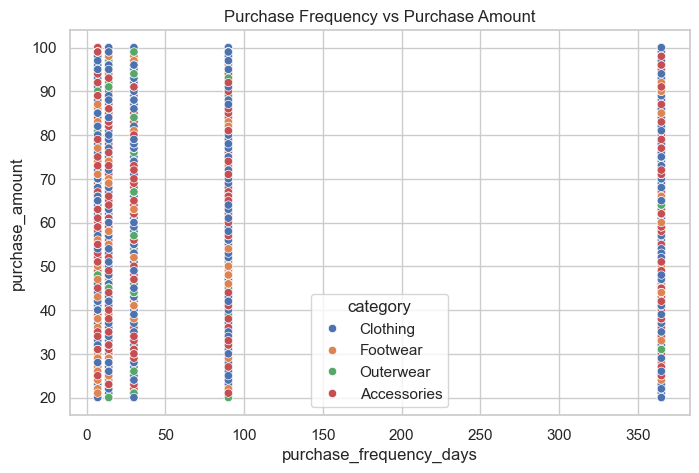

In [27]:
# 9. Purchase Frequency vs Purchase Amount
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='purchase_frequency_days', y='purchase_amount', hue='category')
plt.title("Purchase Frequency vs Purchase Amount")
plt.show()

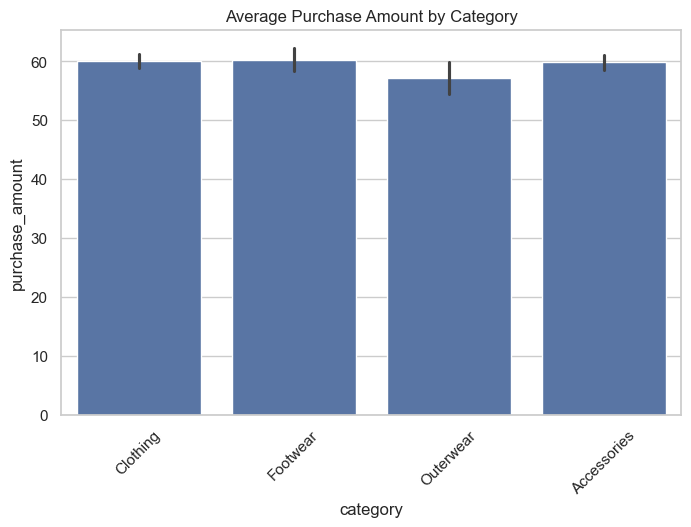

In [28]:
# 10. Category-wise Purchase Amount
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='category', y='purchase_amount', estimator='mean')
plt.title("Average Purchase Amount by Category")
plt.xticks(rotation=45)
plt.show()

In [29]:
df


,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle-aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young_adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young_adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle-aged,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,32,Venmo,Weekly,Adult,7
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,41,Bank Transfer,Bi-Weekly,Middle-aged,14
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,24,Venmo,Quarterly,Middle-aged,90
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,24,Venmo,Weekly,Adult,7


In [30]:
!pip install pymysql sqlalchemy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"    # postgres
password = "master"
host = "localhost"   # same
port = "3306"        # 5432 for postgre sql
database = "mydatabase"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "mytable"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

# Read back sample
pd.read_sql("SELECT * FROM mytable LIMIT 5;", engine)

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle-aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young_adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young_adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle-aged,365
